In [2]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

#Read data
edu_data = pd.read_csv(Path("../Data/CleanedSchoolData.csv"))
edu_data

,Gender,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Average Score
0,female,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,72.0
1,female,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,82.0
2,female,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,90.0
3,male,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,48.0
4,male,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29446,female,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,62.0
29447,male,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,54.0
29448,female,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,66.0
29449,female,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,88.0


In [3]:
lunch_score = edu_data.groupby('LunchType')['Average Score'].mean()
transport_score = edu_data.groupby('TransportMeans')['Average Score'].mean()


Text(0.5, 0, 'Lunch Type')

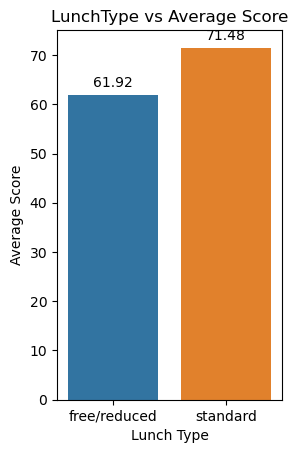

In [21]:
plt.subplot(1, 2, 1)  
sns.barplot(x=lunch_score.index, y=lunch_score.values)
for index, value in enumerate(lunch_score.values):
    formatted_value = '{:.2f}'.format(value)
    plt.text(index, value + 1, str(formatted_value), ha='center', va='bottom')
plt.title('LunchType vs Average Score')
plt.ylabel('Average Score')
plt.xlabel('Lunch Type')

<Axes: title={'center': 'Average Score'}, xlabel='LunchType'>

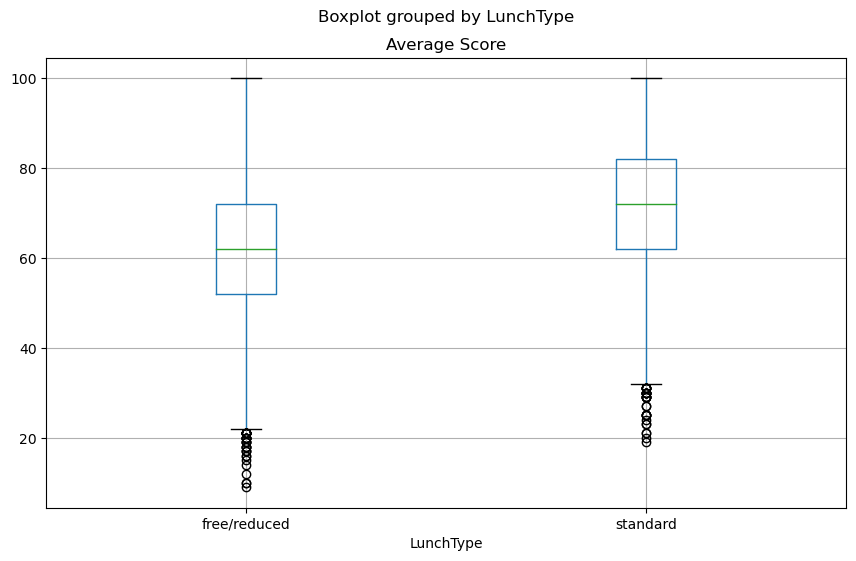

In [5]:
edu_data.boxplot("Average Score", by="LunchType", figsize=(10,6))

In [10]:
free_reduced = edu_data[edu_data["LunchType"] == 'free/reduced']["Average Score"]
standard = edu_data[edu_data["LunchType"] == 'standard']["Average Score"]
stats.f_oneway(free_reduced, standard)


F_onewayResult(statistic=3264.7994552905193, pvalue=0.0)

Text(0.5, 0, 'Transport Means')

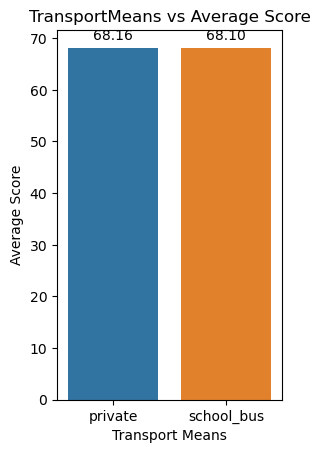

In [22]:
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.barplot(x=transport_score.index, y=transport_score.values)
for index, value in enumerate(transport_score.values):
    formatted_value = '{:.2f}'.format(value)
    plt.text(index, value + 1, str(formatted_value), ha='center', va='bottom')
plt.title('TransportMeans vs Average Score')
plt.ylabel('Average Score')
plt.xlabel('Transport Means')

<Axes: title={'center': 'Average Score'}, xlabel='TransportMeans'>

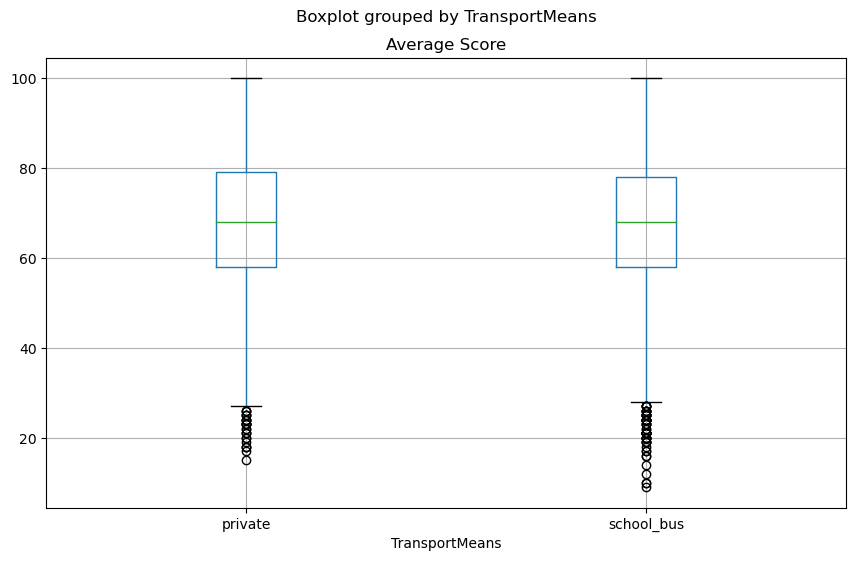

In [8]:
edu_data.boxplot("Average Score", by="TransportMeans", figsize=(10,6))

In [9]:
free_reduced = edu_data[edu_data["TransportMeans"] == 'private']["Average Score"]
standard = edu_data[edu_data["TransportMeans"] == 'school_bus']["Average Score"]
stats.f_oneway(free_reduced, standard)

F_onewayResult(statistic=0.11187989017078957, pvalue=0.7380163566505571)

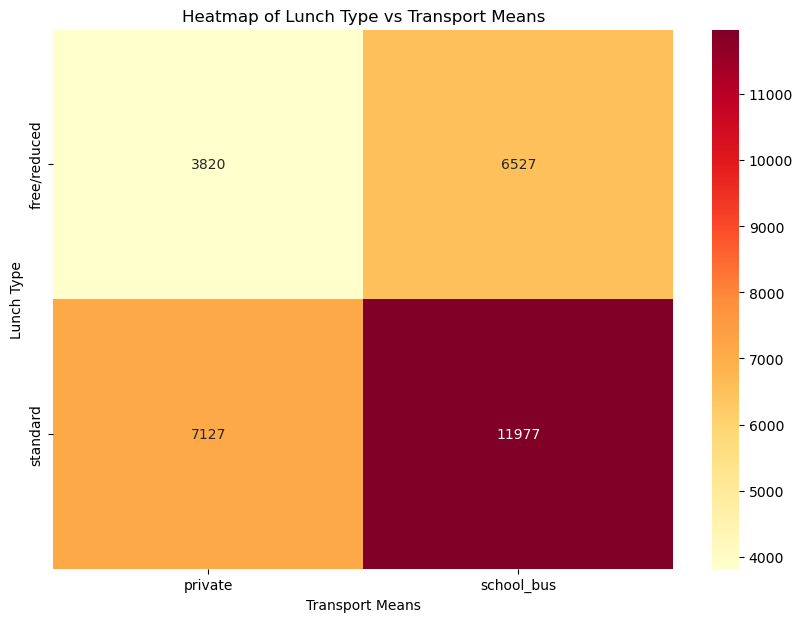

In [5]:
contingency_table = pd.crosstab(edu_data['LunchType'], edu_data['TransportMeans'])

plt.figure(figsize=(10, 7))  # Adjust the size as needed
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlOrRd")
plt.title('Heatmap of Lunch Type vs Transport Means')
plt.xlabel('Transport Means')
plt.ylabel('Lunch Type')
plt.show()
